# sklearn.linear_model.Lasso
- Linear Model trained with L1 prior as regularizer (aka the Lasso)

- The optimization objective for Lasso is:
$ (\frac{1} {(2 * n_samples)}) * ||y - Xw||^2_2 + alpha * ||w||_1$ 
- Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 (no L2 penalty).

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import ManualAlphaSelection
from sklearn.compose import TransformedTargetRegressor

In [2]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib20']
y=y.values.reshape(-1, 1)

# Validation curves

# alpha
- float, default=1.0
- Constant that multiplies the L1 term. Defaults to 1.0. alpha = 0 is equivalent to an ordinary least square, solved by the LinearRegression object. For numerical reasons, using alpha = 0 with the Lasso object is not advised. Given this, you should use the LinearRegression object.

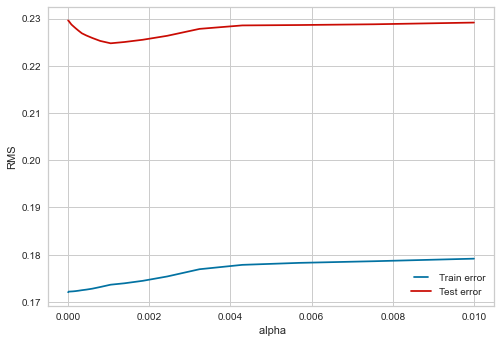

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates =  np.logspace(-8, -2, 50)
train_results = []
test_results = []
for eta in learning_rates:
    model = Lasso(alpha=eta)
#     y_train = power.fit_transform(y_train)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
#     train_pred=power.inverse_transform(train_pred)
#     y_train=power.inverse_transform(y_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
#     y_pred=y_pred.reshape(-1, 1)
#     y_pred=power.inverse_transform(y_pred)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' alpha')
plt.show()

In [28]:

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [29]:

model = Lasso(alpha=0.001)
wrapped_model = TransformedTargetRegressor(regressor=model, transformer=QuantileTransformer(output_distribution='normal'))


In [30]:

mod=wrapped_model.fit(x_train, y_train)


C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (796). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


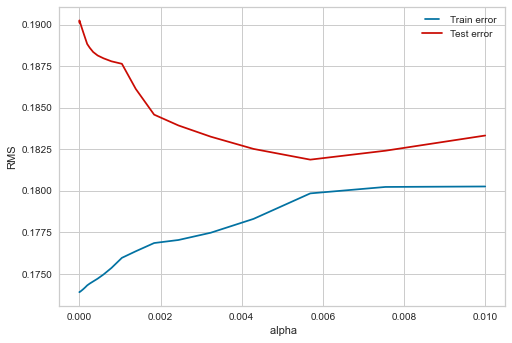

In [187]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates =  np.logspace(-8, -2, 50)
train_results = []
test_results = []
for eta in learning_rates:
    model = Lasso(alpha=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' alpha')
plt.show()

---
---

# Random Hyperparameter Grid

In [3]:
alpha = np.linspace(1e-06, 0.008, 50, endpoint=True)
selection=['cyclic','random']
normalize=[True,False]
warm_start=[True,False]

random_grid = {"alpha" :alpha,
               "normalize":normalize,
               "warm_start":warm_start,
               "selection":selection}

In [4]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
y_t=np.log(y)
rf=Lasso()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y_t)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 3941 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    8.0s finished


RandomizedSearchCV(cv=10, estimator=Lasso(), n_iter=400, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-06, 1.64244898e-04, 3.27489796e-04, 4.90734694e-04,
       6.53979592e-04, 8.17224490e-04, 9.80469388e-04, 1.14371429e-03,
       1.30695918e-03, 1.47020408e-03, 1.63344898e-03, 1.79669388e-03,
       1.95993878e-03, 2.12318367e-03, 2.28642857e-03, 2.44967347e-03,
       2.61291837...
       5.22483673e-03, 5.38808163e-03, 5.55132653e-03, 5.71457143e-03,
       5.87781633e-03, 6.04106122e-03, 6.20430612e-03, 6.36755102e-03,
       6.53079592e-03, 6.69404082e-03, 6.85728571e-03, 7.02053061e-03,
       7.18377551e-03, 7.34702041e-03, 7.51026531e-03, 7.67351020e-03,
       7.83675510e-03, 8.00000000e-03]),
                                        'normalize': [True, False],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   random_state=42, verb

In [5]:
rf_random.best_params_

{'warm_start': True, 'selection': 'cyclic', 'normalize': False, 'alpha': 1e-06}

In [6]:
rf_random.best_estimator_

Lasso(alpha=1e-06, warm_start=True)

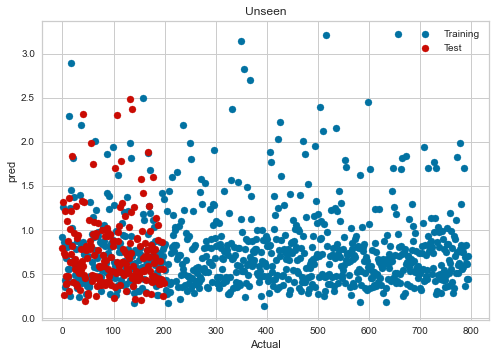

In [17]:

Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib20']
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=21)

plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y, color="b",label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test, color="r",label="Test")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

In [18]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib20']
# y=y.values.reshape(-1, 1)

In [19]:
mode=Lasso(alpha=1e-06, warm_start=True)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

In [20]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [21]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=21)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

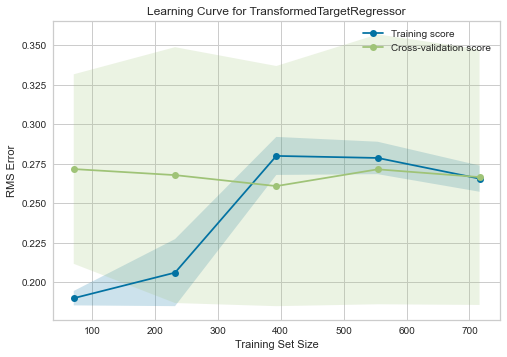

In [22]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [23]:
X = X.to_numpy()
y = y.to_numpy()


In [24]:
y_Test=y_Test.to_numpy()

In [25]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.235550

Root Mean squared error: 0.200257

Root Mean squared error: 0.373125

Root Mean squared error: 0.271742

Root Mean squared error: 0.418607

Root Mean squared error: 0.237135

Root Mean squared error: 0.299297

Root Mean squared error: 0.126766

Root Mean squared error: 0.294906

Root Mean squared error: 0.206685

error COV--->0    1.345477
dtype: float64  error mean --->0    0.144804
Name: mean, dtype: float64  error std --->0    0.19483
Name: std, dtype: float64


# train score

In [26]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.613424
dtype: float64  error mean --->0    0.139069
Name: mean, dtype: float64  error std --->0    0.224377
Name: std, dtype: float64


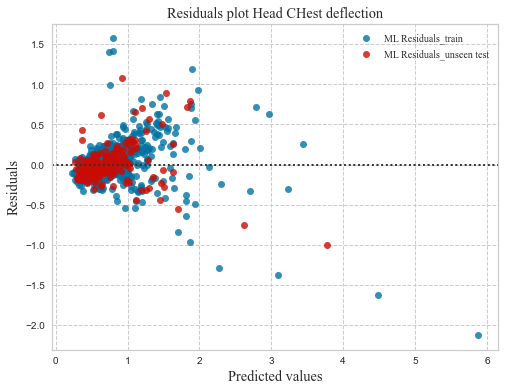

In [27]:
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8, 6))

a=sns.residplot(y=abs(y), x=abs(ytr),color="b",label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),color="r",label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot Head CHest deflection', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()
plt.show()

In [16]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.864098
dtype: float64  error mean --->0    0.052488
Name: mean, dtype: float64  error std --->0    0.15033
Name: std, dtype: float64


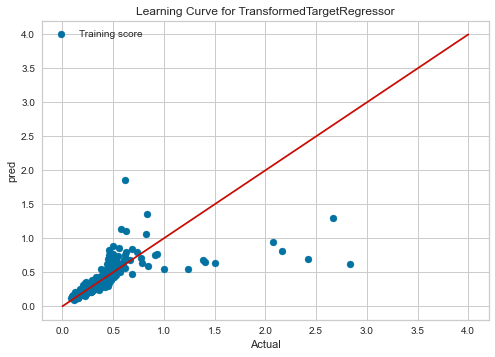

In [17]:
plt.figure()
plt.scatter(y,ytestunk, color="b",label="Training score")
plt.plot([0,4],[0,4],color="r")
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()

---
---

# Grid search

In [203]:
alpha = np.linspace(1e-06, 1e-02, 100, endpoint=True)
selection=['cyclic','random']
normalize=[True,False]
warm_start=[True,False]

random_grid = {"alpha" :alpha,
               "normalize":normalize,
               "warm_start":warm_start,
               "selection":selection}

In [204]:
Data=pd.read_csv('1000_y_data.csv')
X = Data[Data.columns[1:23]]
y = Data['rib13']
# y=y.values.reshape(-1, 1)

In [205]:
yt=np.log(y)
rf = Lasso()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,yt)
    

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 4248 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 7168 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:   25.6s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-06, 1.020e-04, 2.030e-04, 3.040e-04, 4.050e-04, 5.060e-04,
       6.070e-04, 7.080e-04, 8.090e-04, 9.100e-04, 1.011e-03, 1.112e-03,
       1.213e-03, 1.314e-03, 1.415e-03, 1.516e-03, 1.617e-03, 1.718e-03,
       1.819e-03, 1.920e-03, 2.021e-03, 2.122e-03, 2.223e-03, 2...
       7.879e-03, 7.980e-03, 8.081e-03, 8.182e-03, 8.283e-03, 8.384e-03,
       8.485e-03, 8.586e-03, 8.687e-03, 8.788e-03, 8.889e-03, 8.990e-03,
       9.091e-03, 9.192e-03, 9.293e-03, 9.394e-03, 9.495e-03, 9.596e-03,
       9.697e-03, 9.798e-03, 9.899e-03, 1.000e-02]),
                         'normalize': [True, False],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [206]:
reg.best_estimator_

Lasso(alpha=0.00020300000000000003, warm_start=True)

In [207]:
mode=Lasso(alpha=0.00020300000000000003, warm_start=True)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

In [208]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [209]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')
kf=cv

## Learning Curve

<Figure size 576x396 with 0 Axes>

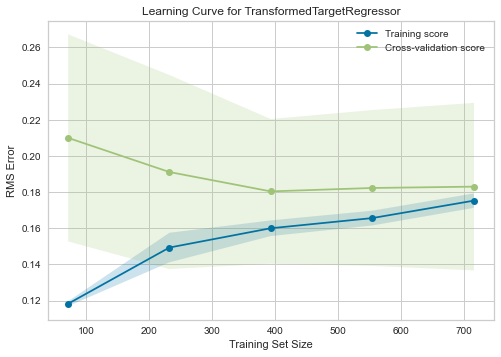

In [210]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [211]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.139079

Root Mean squared error: 0.145993

Root Mean squared error: 0.177912

Root Mean squared error: 0.224888

Root Mean squared error: 0.263687

Root Mean squared error: 0.157263

Root Mean squared error: 0.207677

Root Mean squared error: 0.105962

Root Mean squared error: 0.233706

Root Mean squared error: 0.173624

error COV--->0    1.978494
dtype: float64  error mean --->0    0.103395
Name: mean, dtype: float64  error std --->0    0.204566
Name: std, dtype: float64


# train score

In [212]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.611879
dtype: float64  error mean --->0    0.092557
Name: mean, dtype: float64  error std --->0    0.149191
Name: std, dtype: float64
